## **Request**

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8ce18742-c894-4172-aa2a-fb09a14586f9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.json_normalize(data['data'])

In [51]:
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11793,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19776500.00000,19776500.00000,False,NaN,1,NaN,NaN,None,2024-11-02T01:48:00.000Z,69626.81615,48642742805.96705,17.85850,0.05148,-0.30769,4.64392,14.24164,17.38432,15.03941,1376974729548.45337,58.90490,1462163139105.37988,None,2024-11-02T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-02 02:54:22.032425
1,1027,Ethereum,ETH,ethereum,9471,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120410814.65118,120410814.65118,True,NaN,2,NaN,NaN,None,2024-11-02T01:48:00.000Z,2514.13602,19525851527.34678,-2.34180,-0.03262,-0.17212,3.12526,5.63741,-0.72709,-13.08259,302729165770.73859,12.95030,302729165770.73999,None,2024-11-02T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-02 02:54:22.032425
2,825,Tether USDt,USDT,tether,102166,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120572829275.28133,122337925860.64384,True,NaN,3,NaN,NaN,None,2024-11-02T01:48:00.000Z,0.99954,74057017057.21114,8.55670,0.00229,0.09473,0.11809,-0.02406,-0.04280,-0.01091,120517855798.38095,5.15560,122282147612.91000,None,2024-11-02T01:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-02 02:54:22.032425
3,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099925.64461,144099925.64461,False,NaN,4,NaN,NaN,None,2024-11-02T01:48:00.000Z,574.20869,1687081631.39624,-7.48250,0.02257,-0.47682,-0.42963,5.03856,8.21979,8.87298,82743428820.29443,3.53960,82743428820.28999,None,2024-11-02T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-02 02:54:22.032425
4,5426,Solana,SOL,solana,776,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,470836225.49066,587676162.34071,True,NaN,5,NaN,NaN,None,2024-11-02T01:48:00.000Z,167.53475,3036576274.75729,10.92870,0.39506,-0.10966,2.29839,18.30627,24.30137,17.53996,78881430689.15567,3.37660,98456180636.99001,None,2024-11-02T01:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-02 02:54:22.032425


In [52]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '8ce18742-c894-4172-aa2a-fb09a14586f9',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df = pd.concat([df,df2])


In [ ]:
import os
from time import time, sleep

for i in range(333):
  api_runner()
  print('Api Runner completed')
  sleep(60)
exit()

In [48]:
df.to_csv('coin_market.csv', index = False, encoding = 'utf-8-sig')

In [49]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## **Exploring Data**

In [20]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()
df3 = df3.transpose()
df3


name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,TRON,Cardano,Toncoin,Shiba Inu,Avalanche,Chainlink,Bitcoin Cash,Polkadot,Sui,UNUS SED LEO,Dai,Litecoin
quote.USD.percent_change_1h,0.04625,-0.02268,0.00535,0.05593,0.39852,0.00905,-0.06044,-0.05393,-0.08903,-0.07181,0.09709,0.14414,0.04115,-0.34095,0.30136,-0.04819,0.05707,0.06833,-0.00076,0.04028
quote.USD.percent_change_24h,-0.01494,0.09443,0.09949,-0.38762,0.01985,0.01729,1.03602,-0.07929,-0.48792,6.22484,1.68121,0.05089,0.02808,-0.81496,-0.26267,-0.41770,0.44090,0.05286,0.01888,2.25840
quote.USD.percent_change_7d,4.62989,3.07334,0.11407,-0.47170,2.27198,0.01076,1.55058,22.12551,2.66953,9.81703,2.32818,6.83270,-0.41672,1.62154,0.20218,-2.21371,16.00274,0.65947,0.01248,2.55401
quote.USD.percent_change_30d,14.15147,5.57323,-0.02540,5.06419,18.42438,0.00380,-3.87316,51.90288,8.53347,4.12062,-6.10095,7.20513,-2.17763,5.28603,10.31889,-5.27168,0.54927,3.24668,-0.02280,11.31901
quote.USD.percent_change_60d,17.38313,-0.73388,-0.04100,8.13406,24.08977,0.01230,-9.25205,61.62837,8.55235,7.51202,-5.85238,29.75140,10.77306,5.08802,8.47755,-7.26093,154.36420,0.53863,-0.00799,7.51172
quote.USD.percent_change_90d,14.97072,-13.19154,-0.00819,8.73997,17.05412,0.00612,-6.82766,49.50938,33.31567,-0.76874,-17.60227,25.71366,9.89944,-2.77877,-3.01071,-22.34249,227.96488,5.98550,-0.01597,9.78769


In [21]:
type(df3)

pandas.core.frame.DataFrame

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df3.columns

Index(['Bitcoin', 'Ethereum', 'Tether USDt', 'BNB', 'Solana', 'USDC', 'XRP',
       'Dogecoin', 'TRON', 'Cardano', 'Toncoin', 'Shiba Inu', 'Avalanche',
       'Chainlink', 'Bitcoin Cash', 'Polkadot', 'Sui', 'UNUS SED LEO', 'Dai',
       'Litecoin'],
      dtype='object', name='name')

<Axes: xlabel='name'>

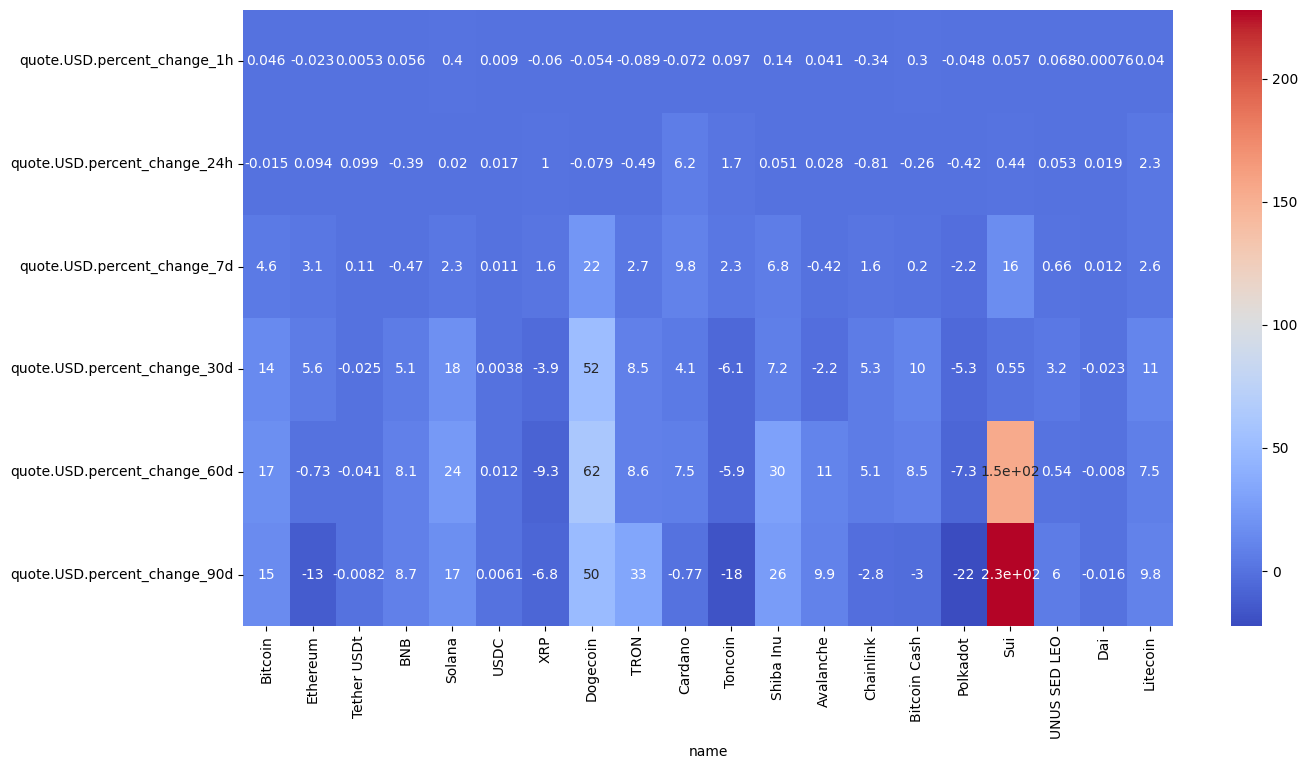

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df3, annot=True, cmap='coolwarm')

<Axes: >

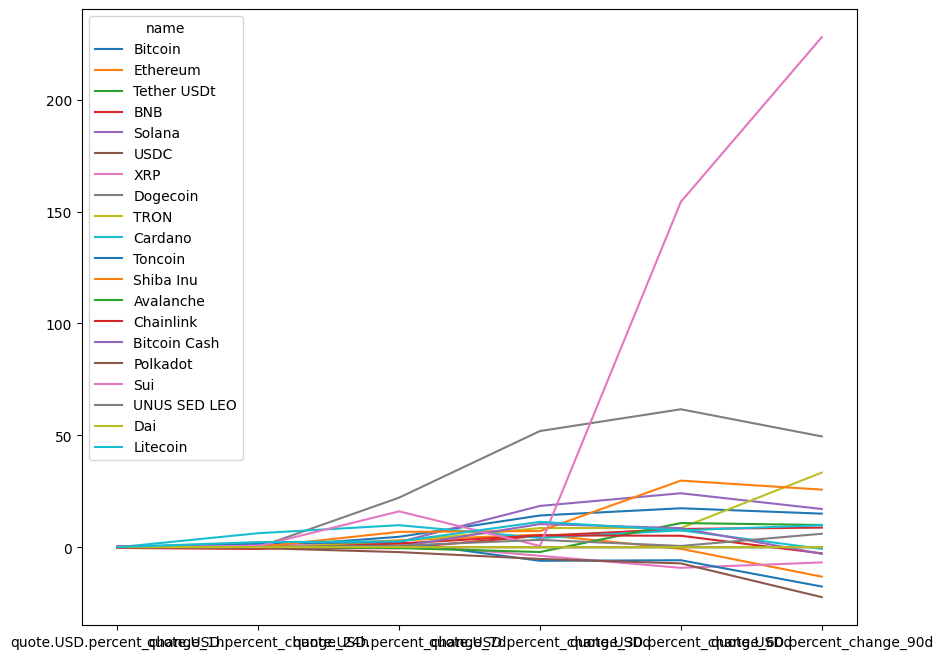

In [26]:
df3.plot(kind = 'line', figsize = (10,8))

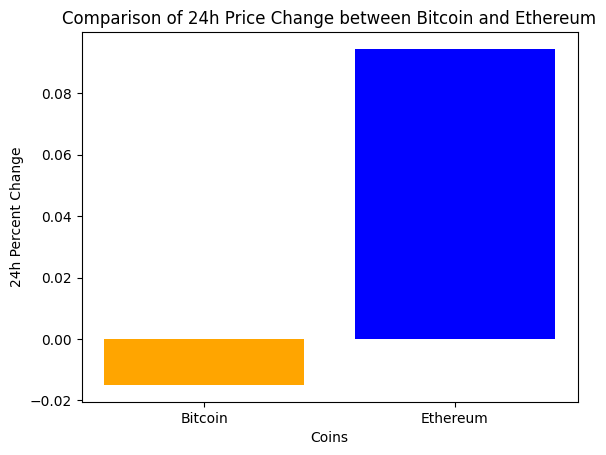

In [32]:
bitcoin_data = df3.loc['quote.USD.percent_change_24h', 'Bitcoin']
ethereum_data = df3.loc['quote.USD.percent_change_24h', 'Ethereum']

coins = ['Bitcoin', 'Ethereum']
percent_change_24h = [bitcoin_data, ethereum_data]

plt.bar(coins, percent_change_24h, color=['orange', 'blue'])
plt.xlabel('Coins')
plt.ylabel('24h Percent Change')
plt.title('Comparison of 24h Price Change between Bitcoin and Ethereum')
plt.show()

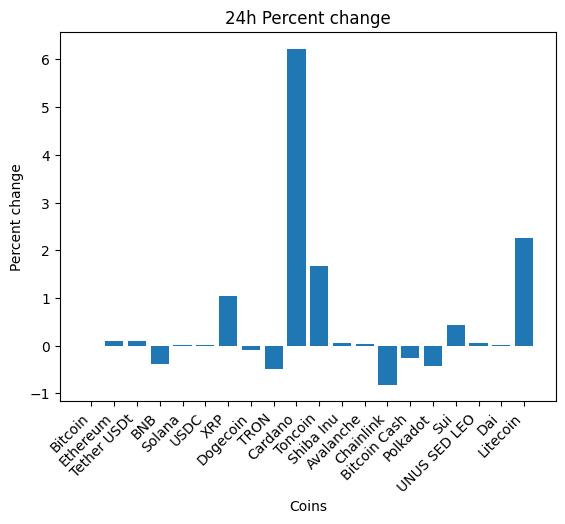

Coin: Cardano has max change: 6.224837685


In [36]:
percent_change_24h_all = df3.loc['quote.USD.percent_change_24h']
max_change_coin = percent_change_24h_all.idxmax()
max_change_value = percent_change_24h_all.max()

plt.bar(percent_change_24h_all.index, percent_change_24h_all.values)
plt.xlabel('Coins')
plt.ylabel('Percent change')
plt.title('24h Percent change')
plt.xticks(rotation=45, ha='right')
plt.show()

print(f'Coin: {max_change_coin} has max change: {max_change_value}')

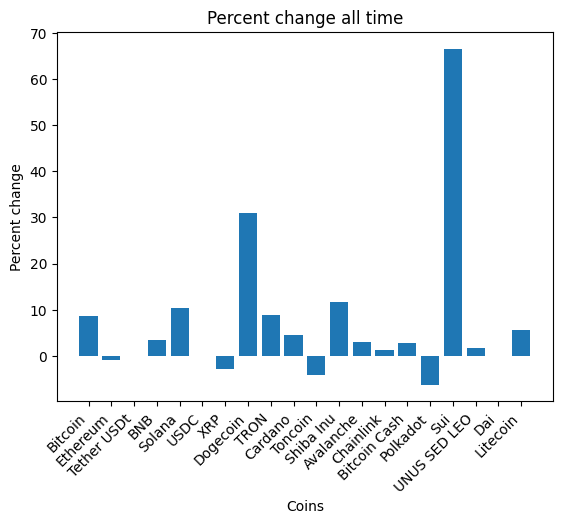

Coin: Sui has max percent change over time: (66.56%)


In [50]:
all_coin = df3.columns
average_price_change = df3[all_coin].mean()
max_avg_change_coin = average_price_change.idxmax()
max_avg_change_value = average_price_change.max()

plt.bar(average_price_change.index, average_price_change.values)
plt.title('Percent change all time')
plt.xlabel('Coins')
plt.ylabel('Percent change')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

print(f"Coin: {max_avg_change_coin} has max percent change over time: ({max_avg_change_value:.2f}%)")